# Introduction and Problem Statement
- Provide a detailed explanation of the problem you're solving: classification of handwritten digits using MNIST.
- Briefly describe the MNIST dataset and its importance in deep learning research.
- Specify the goal: achieve high accuracy with a CNN.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

2025-01-22 09:13:12.765053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset Overview
- Load the MNIST dataset using TensorFlow/Keras utilities.
- Examine the dataset: dimensions, distribution, and examples of the images.
- Visualize some sample images with labels using Matplotlib.

In [2]:
# load in dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Check dimensions
print(f"training_set shape: {X_train.shape}")
print(f"test_set shape: {X_test.shape}")

training_set shape: (60000, 28, 28)
test_set shape: (10000, 28, 28)


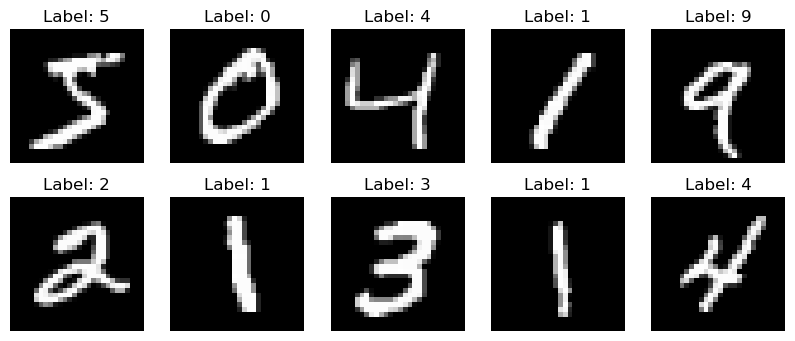

In [4]:
# Visualize sample images
plt.figure(figsize = (10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## Data Preprocessing
- Normalize pixel values to the range [0, 1].
- One-hot encode the labels.
- Split the dataset into training, validation, and testing sets.

In [5]:
# Normalize pixel values, For RGB images, divide by 255 for each channel color [0, 255] range
X_train = X_train/255
X_test = X_test/255

In [6]:
# Reshape data to add channel dimension for grayscale images
# Adjust shape to meet input requirements of CNN
X_train = X_train.reshape(-1, 28, 28, 1) # -1 argument allows np/tensor to automatically infer number of samples
X_test = X_test.reshape(-1, 28, 28, 1) # 1 is channel dimnesions since grayscale images only have 1 channel

In [7]:
# One Hot encode the labels
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [8]:
# Split training data into training and validation sets
# Split training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

## Build CNN Model

In [10]:
# Build Model
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(10, activation = 'softmax')
])

In [11]:
# Compile the model
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

In [13]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs = 3, # due to runtime will shorten to 3
    batch_size = 32
)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9675 - loss: 0.1145 - val_accuracy: 0.9848 - val_loss: 0.0513
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9792 - loss: 0.0713 - val_accuracy: 0.9857 - val_loss: 0.0594
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - accuracy: 0.9848 - loss: 0.0526 - val_accuracy: 0.9900 - val_loss: 0.0401


In [14]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test Accuracy: {test_accuracy * 100: .2f}%")

Test Accuracy:  99.09%


- Model is highly effective with 99% accuracy

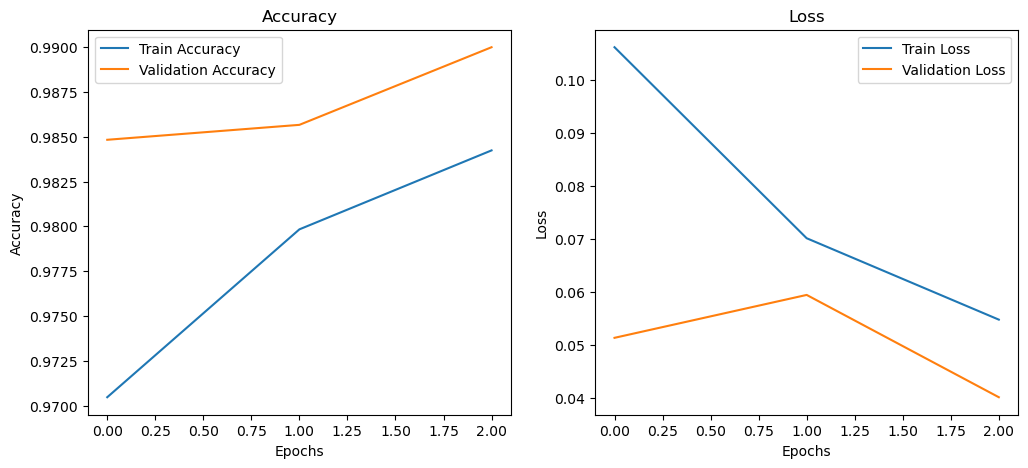

In [15]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- Model is increasing steadily across the epochs, indicating model is learning and improving 
- If time permits could run model over more epochs to improve accuracy
- Does not appear to be overfittings since the validation accuracy is improving as well
- Overall trend for validation loss is stable

- Good genralizaion 
- Even with 3 epochs model acheives good accuracy adn loss behaviors, could train on more epochs

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


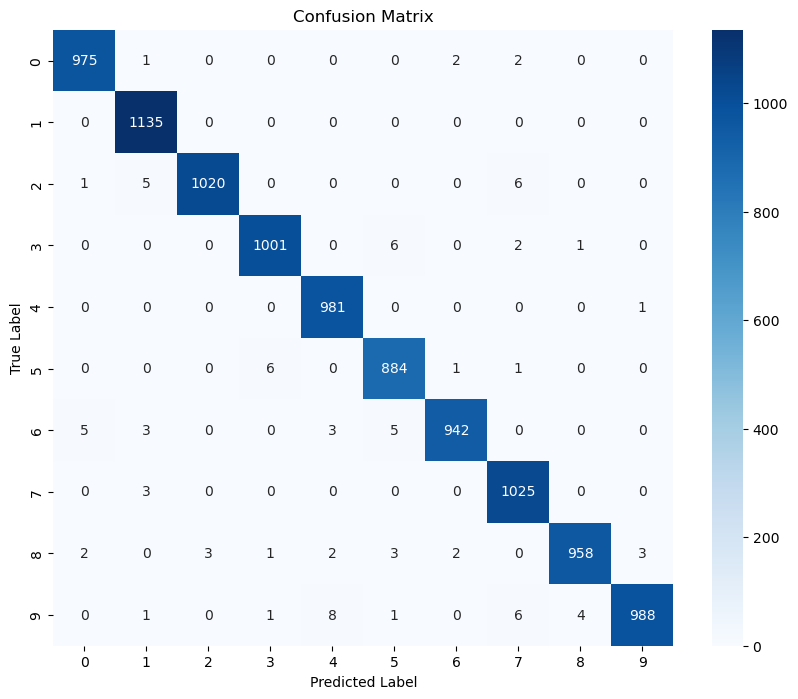

In [16]:
# Confusion Matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- high accruacy across all classes
- Look into misclassifications with 5 or 9 to understand the model better

In [17]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.98      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



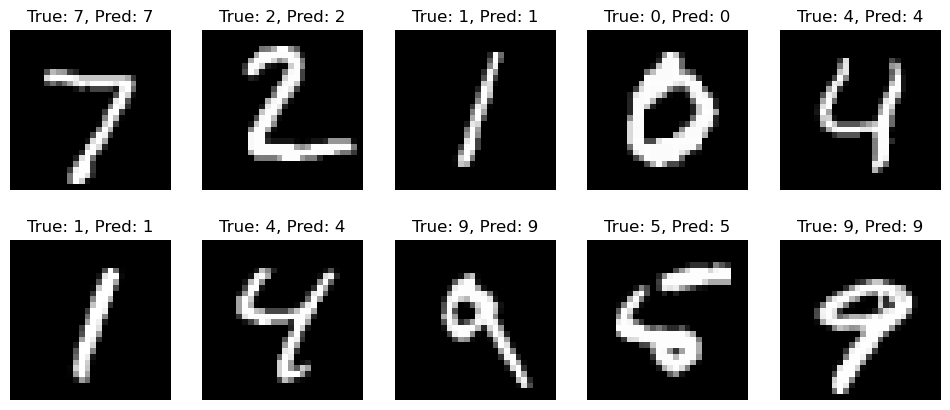

In [18]:
# Visualize Predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Pred: {y_pred[i]}")
    plt.axis('off')
plt.show()

## Potential Next Steps
- Analyze misclassifications
- Introduce data augmentation to make model more robust
- Use deeper CNNs to improve accuracy score